# Experiment 1: All metrics / Default parameters / TSB

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [2]:
project_root_path = os.path.join('..', '..')
experiment_path = os.path.join(project_root_path, 'experiments', 'allmetrics_defparams_tsb')
results_path = os.path.join(experiment_path, 'results')

save_fig_path = os.path.join(experiment_path, 'figures')
os.makedirs(save_fig_path, exist_ok=True)

In [3]:
def load_results(csv_file):
    return pd.read_csv(csv_file, index_col=0)

result_files = [file for file in os.listdir(results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(result_files)}')

Number of result files: 7


In [4]:
formal_names = {
    'FF-VUS-PR': 'FF-VUS (L: 128)',
    'FF-VUS-PR-GPU': 'FF-VUS-GPU (L: 128)',
    'AUC-PR': 'AUC',
    'VUS-PR': 'VUS (L: 128)',
    'RF': 'RF',
    'AFFILIATION': 'AFFILIATION',
    'RANGE-AUC-PR': 'Range-AUC (L: 128)',
}

color_palette = {
    'FF-VUS (L: 128)': '#99cae4',          # Good
    'FF-VUS-GPU (L: 128)': '#40da70',     # Very Good
    'AUC': '#f1a73f',                # Secondary competitor
    'VUS (L: 128)': '#b02a41',            # Main competitor
    'RF': '#a6d2c3',                    # Useless competitors
    'AFFILIATION': '#95bdaf',        # Useless competitors
    'Range-AUC (L: 128)': '#84a89c',       # Useless competitors
}

In [5]:
# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Read and combine all files
for file in tqdm(result_files):
    file_path = os.path.join(results_path, file)
    curr_df = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, curr_df], ignore_index=True)
    
df['Metric'] = df['Metric'].map(formal_names)
df.sample(3)

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 105.34it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Metric,Metric value,Metric time,Step,Global mask,...,Safe mask time,Thresholds time,Score mask time,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Anomalies coordinates time
5531,KDD21/011_UCR_Anomaly_DISTORTEDECG1_10000_1180...,29999,1,300.000000,128.0,VUS (L: 128),0.848051,0.305769,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,MITDB/221.test.csv@2.out,649999,389,337.205656,128.0,FF-VUS (L: 128),0.738199,1.729186,1.0,True,...,0.004761,0.011951,0.023598,1.232634,0.12674,0.031668,0.254072,0.000304,0.000155,NaN
4084,OPPORTUNITY/S4-ADL1.test.csv@42.out,41259,2,801.000000,128.0,VUS (L: 128),0.040013,0.607821,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis

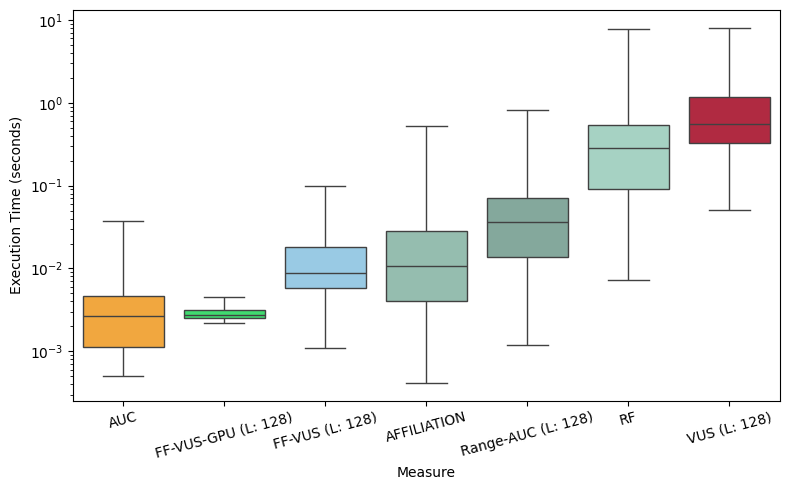

In [6]:
# What is the execution time difference
median_times = df.groupby('Metric')['Metric time'].median()
order = median_times.sort_values().index.to_list()

plt.figure(figsize=(8, 5))
sns.boxplot(
    y='Metric time', 
    x='Metric', 
    hue='Metric', 
    data=df, 
    showfliers=False, 
    log_scale=True, 
    palette=color_palette, 
    order=order, 
    saturation=1,
)
plt.xlabel('Measure')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_comparison.svg'))
plt.show()

In [12]:
values_df

Metric,AFFILIATION,AUC,FF-VUS (L: 128),FF-VUS-GPU (L: 128),RF,Range-AUC (L: 128),VUS (L: 128)
Time series,,,,,,,
Daphnet/S01R02E0.test.csv@1.out,0.592227,0.047254,0.100141,0.137259,0.000000,0.075665,0.054889
Daphnet/S01R02E0.test.csv@4.out,0.745875,0.055707,0.285641,0.070255,0.000000,0.071661,0.080396
Daphnet/S01R02E0.test.csv@6.out,0.752115,0.161307,0.219930,0.219948,0.000000,0.132590,0.214336
Daphnet/S02R01E0.test.csv@3.out,0.786191,0.130374,0.425768,0.610363,0.016435,0.478953,0.186074
Daphnet/S02R01E0.test.csv@4.out,0.845286,0.143916,0.317816,0.250184,0.033405,0.183251,0.287418
...,...,...,...,...,...,...,...
YAHOO/Yahoo_A2synthetic_96_data.out,0.381477,0.028571,0.003897,0.855527,0.000000,0.053706,0.047910
YAHOO/Yahoo_A2synthetic_97_data.out,0.689987,0.028046,0.832778,0.038074,0.000000,0.907253,0.077319
YAHOO/Yahoo_A2synthetic_98_data.out,0.629413,0.005713,0.725587,0.014486,0.500000,0.199274,0.169186


In [30]:
df[['Time series', 'Metric', 'Metric value']]

,Time series,Metric,Metric value
0,Daphnet/S03R03E4.test.csv@3.out,Range-AUC (L: 128),0.029295
1,Daphnet/S09R01E4.test.csv@3.out,Range-AUC (L: 128),0.025808
2,Daphnet/S03R02E0.test.csv@4.out,Range-AUC (L: 128),0.573444
3,Daphnet/S09R01E4.test.csv@6.out,Range-AUC (L: 128),0.026826
4,Daphnet/S03R02E0.test.csv@3.out,Range-AUC (L: 128),0.112658
...,...,...,...
13183,KDD21/026_UCR_Anomaly_DISTORTEDInternalBleedin...,AUC,0.130575
13184,KDD21/170_UCR_Anomaly_gaitHunt1_18500_33070_33...,AUC,0.002341
13185,KDD21/223_UCR_Anomaly_mit14046longtermecg_7412...,AUC,0.020801
13186,KDD21/213_UCR_Anomaly_STAFFIIIDatabase_33211_1...,AUC,0.013448


In [50]:
values_df[['Dif', 'dif 2']] = values_df.apply(lambda row: row - vus_df.loc[row.name]['Metric value'], axis=1)
values_df

Metric,FF-VUS (L: 128),FF-VUS-GPU (L: 128),Dif,dif 2
Time series,,,,
Daphnet/S01R02E0.test.csv@1.out,0.100141,0.137259,0.045252,0.082370
Daphnet/S01R02E0.test.csv@4.out,0.285641,0.070255,0.205244,-0.010141
Daphnet/S01R02E0.test.csv@6.out,0.219930,0.219948,0.005595,0.005613
Daphnet/S02R01E0.test.csv@3.out,0.425768,0.610363,0.239694,0.424289
Daphnet/S02R01E0.test.csv@4.out,0.317816,0.250184,0.030399,-0.037233
...,...,...,...,...
YAHOO/Yahoo_A2synthetic_96_data.out,0.003897,0.855527,-0.044013,0.807616
YAHOO/Yahoo_A2synthetic_97_data.out,0.832778,0.038074,0.755458,-0.039246
YAHOO/Yahoo_A2synthetic_98_data.out,0.725587,0.014486,0.556401,-0.154700


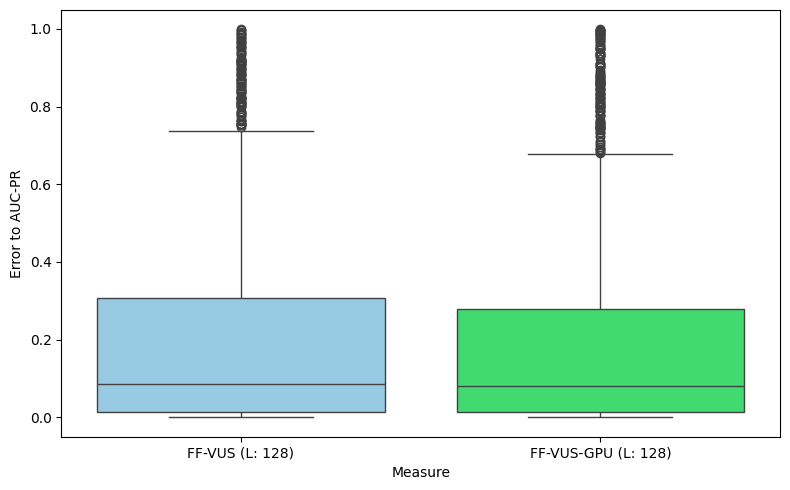

In [52]:
# What is the error between the difference metrics
current_metrics = ['FF-VUS (L: 128)', 'FF-VUS-GPU (L: 128)']
vus_df = df[df['Metric'] == 'VUS (L: 128)'].set_index('Time series')
plt.figure(figsize=(8, 5))

values_df = df[df['Metric'].isin(current_metrics)][['Time series', 'Metric', 'Metric value']]
values_df = values_df.pivot(columns='Metric', index='Time series', values='Metric value')
dif_df = values_df.apply(lambda row: row - vus_df.loc[row.name]['Metric value'], axis=1)

sns.boxplot(dif_df.abs(), showfliers=True, palette=color_palette, saturation=1)
plt.xlabel('Measure')
plt.ylabel('Error to AUC-PR')
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'error_to_aucpr.svg'))
plt.show()

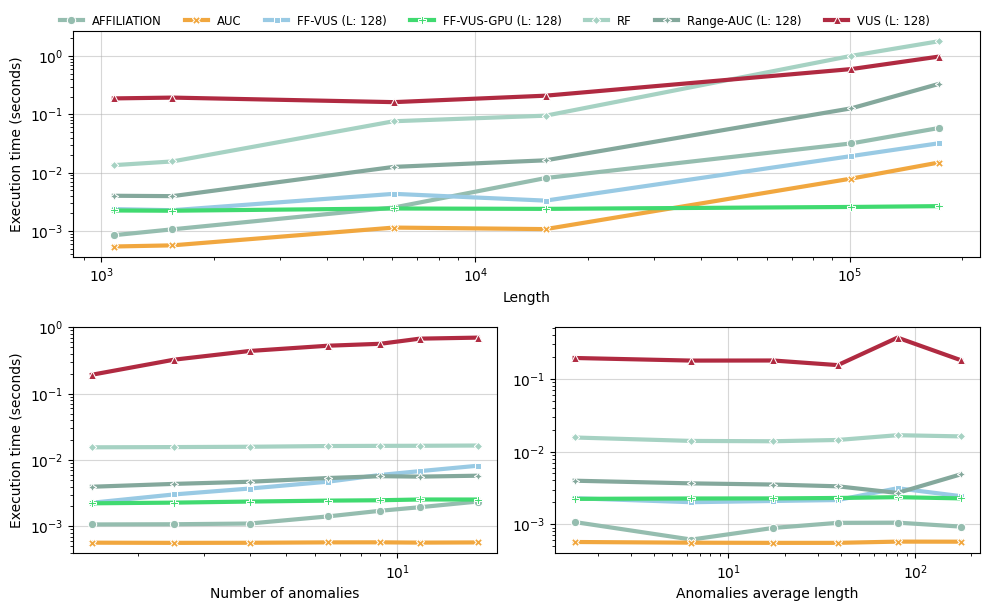

In [7]:
bins = 20
attr_control = {}
attributes = ["Length", "Number of anomalies", "Anomalies average length"]
for attr in attributes:
    df[f'{attr} bin'] = pd.qcut(df[attr], q=bins, duplicates='drop')
    attr_control[attr] = df[f'{attr} bin'].value_counts().idxmax()

attr_axis = {
    "Length": (2, 1, 1), 
    "Number of anomalies": (2, 2, 3), 
    "Anomalies average length": (2, 2, 4)
}
fig = plt.figure(figsize=(10, 6))
for i, attribute in enumerate(attributes):
    axis = fig.add_subplot(*attr_axis[attribute])

    mask = pd.Series(True, index=df.index)
    for attr in attributes:
        if attr != attribute:
            mask &= (df[f'{attr} bin'] == attr_control[attr])
    curr_df = df[mask]
    
    # Group by bin and metric, compute mean
    grouped = (
        curr_df
        .groupby([f'{attribute} bin', 'Metric'], observed=False)['Metric time']
        .mean()
        .reset_index()
    )
  
    # Convert bin to the midpoint for plotting
    grouped['bin_center'] = grouped[f'{attribute} bin'].apply(lambda x: x.mid)

    # Plot
    sns.lineplot(
        x='bin_center',
        y='Metric time',
        hue='Metric',
        data=grouped,
        ax=axis,
        palette=color_palette,
        markers=True,
        style='Metric',
        dashes = False,
        linewidth=3,
        # size='Metric', 
        # size_order=['FF-VUS-GPU (L: 128)', 'FF-VUS (L: 128)', 'AFFILIATION', 'VUS (L: 128)', 'Range-AUC (L: 128)', 'RF', 'AUC']
    )

    axis.set_xlabel(attribute)
    axis.set_ylabel("Execution time (seconds)" if i != 2 else "")
    axis.set_yscale('log')
    axis.set_xscale('log')
    axis.grid(axis='both', alpha=0.5)
    if i != 0: 
        axis.get_legend().remove()
    else:
        legend_axis = axis

handles, labels = legend_axis.get_legend_handles_labels()
legend_axis.get_legend().remove()
fig.legend(
    handles,
    labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=len(labels),
    frameon=False,
    fontsize='small'
)

plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_per_attr.svg'))
plt.show()

## Random stuff

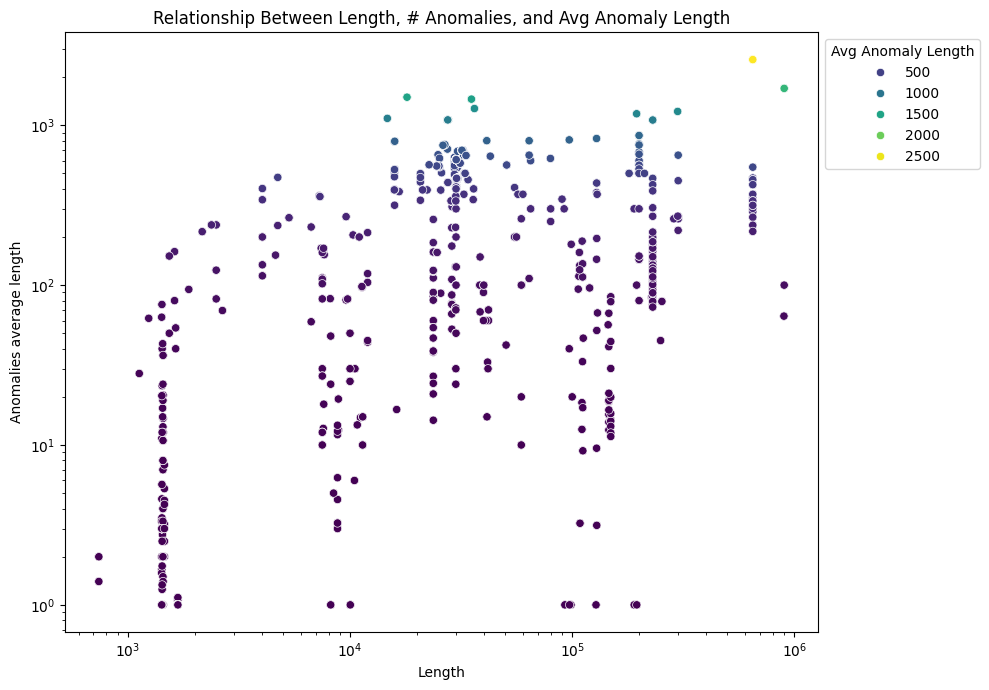

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(
    data=df,
    x='Length',
    y='Anomalies average length',
    # size='Anomalies average length',
    hue='Anomalies average length',
    palette='viridis',
    sizes=(20, 300),
    ax=ax
)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Relationship Between Length, # Anomalies, and Avg Anomaly Length")
ax.legend(title='Avg Anomaly Length', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [10]:
df['Dataset'] = df.apply(lambda row: row['Time series'].split('/')[0] , axis=1)
df.sample(3)

,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Metric,Metric value,Metric time,Step,Global mask,...,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Anomalies coordinates time,Length bin,Number of anomalies bin,Anomalies average length bin,Dataset
2900,YAHOO/YahooA4Benchmark-TS85_data.out,1679,16,1.0,128.0,FF-VUS (L: 128),0.813517,0.009972,1.0,True,...,0.0022,0.004471,0.001648,0.000225,0.000125,NaN,"(1420.0, 1679.0]","(13.0, 20.0]","(0.999, 2.0]",YAHOO
9217,KDD21/247_UCR_Anomaly_tilt12755mtable_50211_12...,199999,1,80.0,NaN,AFFILIATION,0.489375,0.052489,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"(146254.0, 200000.0]","(0.999, 2.0]","(76.069, 84.716]",KDD21
11240,KDD21/082_UCR_Anomaly_DISTORTEDresperation4_70...,195249,1,1.0,NaN,RF,0.000000,1.819989,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"(146254.0, 200000.0]","(0.999, 2.0]","(0.999, 2.0]",KDD21
